# Mashroom model

## Data Set Information:

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

## Importing the required libraries :

By looking at the dataset in the github, it looks like classification probelm hence loading classification libraries

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset:

In [120]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('mashrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


All the data non numeric, We need to convert it to float  or int

## EDA (Exploratory Data Analysis):

In [121]:
df.shape

(8124, 23)

we see 8124 rows and 23 columns including target column

In [122]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [123]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All the data object type, We need to convert it to float or int

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

we see that every colums contains object values datatype, we need use encoding techniques to convert it to int datatype

In [125]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

we can see no null values present in any columns

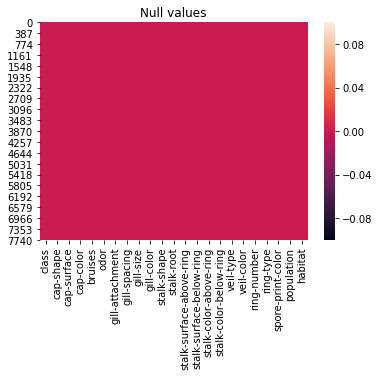

In [126]:
#checking the missing values with visualization technique
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

## Data Visualization:

### Univariate Analysis

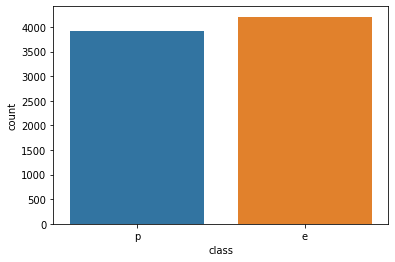

In [127]:
#Lets check for class imbalance problem
sns.countplot(x="class",data=df)
plt.show()

In [128]:
e,p = df['class'].value_counts()
print(e)
print(p)

4208
3916


Since all the values in "Class" column is 'p' and 'e', we can use this formula.

In [129]:
print(e/len(df['class']))

0.517971442639094


In [130]:
print(p/len(df['class']))

0.48202855736090594


we can see that 48 % is p and 52 % is e , so there is no class imbalance problem

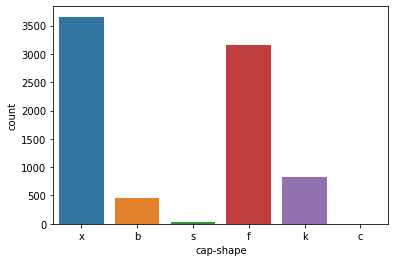

In [131]:
sns.countplot(x='cap-shape',data=df)
plt.show()


In cap shape we can see x and f are high, but s and c are very low

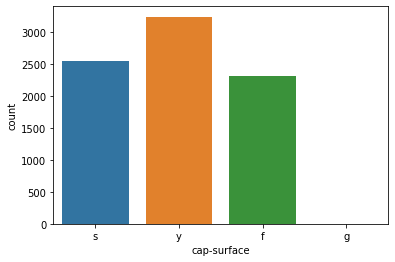

In [132]:
sns.countplot(x='cap-surface',data=df)
plt.show()

In cap-surface s , y, f are almost similar, but g is very low

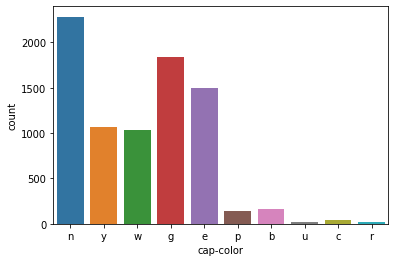

In [133]:
sns.countplot(x='cap-color',data=df)
plt.show()

In cap-color n,y,w,g,e, are high, but p,b,u,c,r are very less.

### Bivariate Analysis

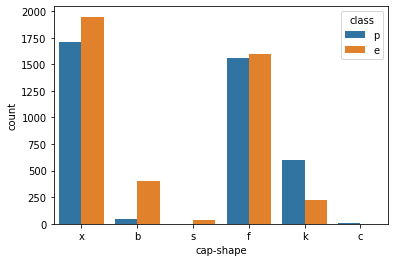

In [134]:
sns.countplot(x="cap-shape",hue="class",data=df)
plt.show()

In cap-shape x and f both have alsmost equal count of poisonous and not edible mushrooms
but in cap shape as k and b poisonous are high

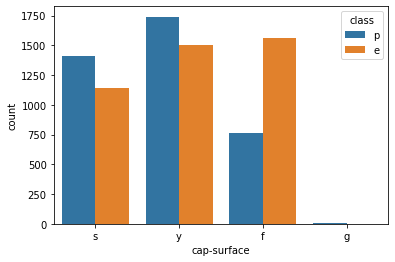

In [135]:
sns.countplot(x='cap-surface',hue="class",data=df)
plt.show()

In cap-surface almost s, y are having similar count but f ,g having imbalances

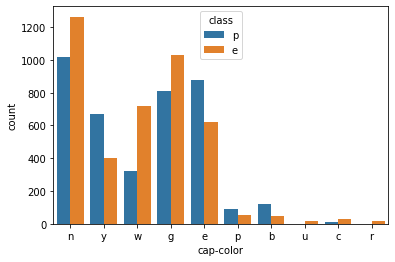

In [136]:
sns.countplot(x='cap-color',hue="class",data=df)
plt.show()

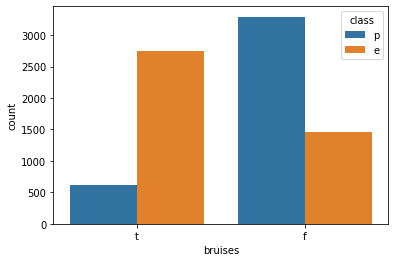

In [137]:
sns.countplot(x= 'bruises',hue="class",data=df)
plt.show()


In bruises mushrooms with bruises are having less poisonous count
and mushrooms without bruises are poisonous.

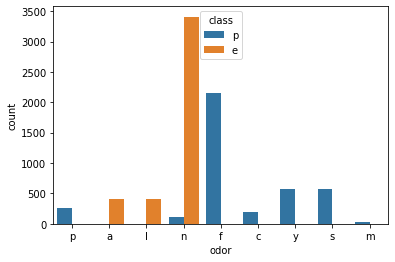

In [138]:
sns.countplot(x= 'odor',hue="class",data=df)
plt.show()

### Multivariate Analysis

In [139]:
#sns.pairplot(df)

we get error all the values are in object type, first we need to convert it to float or int

## Data Preprocessing :

### Descriptive analysis or summary statistics

In [140]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


we are not getting required statistical summary since all the columns contains objcet values

### Label encoding

Using label encoding we are able to convert object values to int values.

 I have written the small piece of code to get the list value associated with the variable

In [141]:
map_list = []
le = LabelEncoder()

for i in range(len(df.columns)):
    df[df.columns[i]] = le.fit_transform(df[df.columns[i]])
    map_dict = {index:label for index,label in enumerate(le.classes_)}
    map_list.append(map_dict)
    
map_list

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

Now the list of dictionaries is created which will show the corresponding values associated with the values and encoding is also done

In [142]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

now all the values are converted into int type , now lets get the statistical summary of this dataset

In [143]:
#sns.pairplot(df)

Pairplot takes lot of time since we we have high number of rows and columns

Lets continue with EDA process, as the datatype converted from object to int

In [144]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


from the above table we see that standard diviation is high in cap-color and gill-color column and also other columns, but no null values are present

### Now lets check for unique values in each columns

In [145]:
for column in df.columns:
    if len(df[column].unique()) == 1:
        print('Column {} has {} values'.format(column,len(df[column].unique())))

Column veil-type has 1 values


so we see that column "veil-type" has only 1 unique, which is useless so lets delete this column

In [146]:
df.drop('veil-type',inplace = True,axis = 1)

In [147]:
df.shape

(8124, 22)

lets check the correlation

In [148]:
#df.corr()

We don't get see the insights correclty since there many columns, lets visualize the corr() matrix with heat map

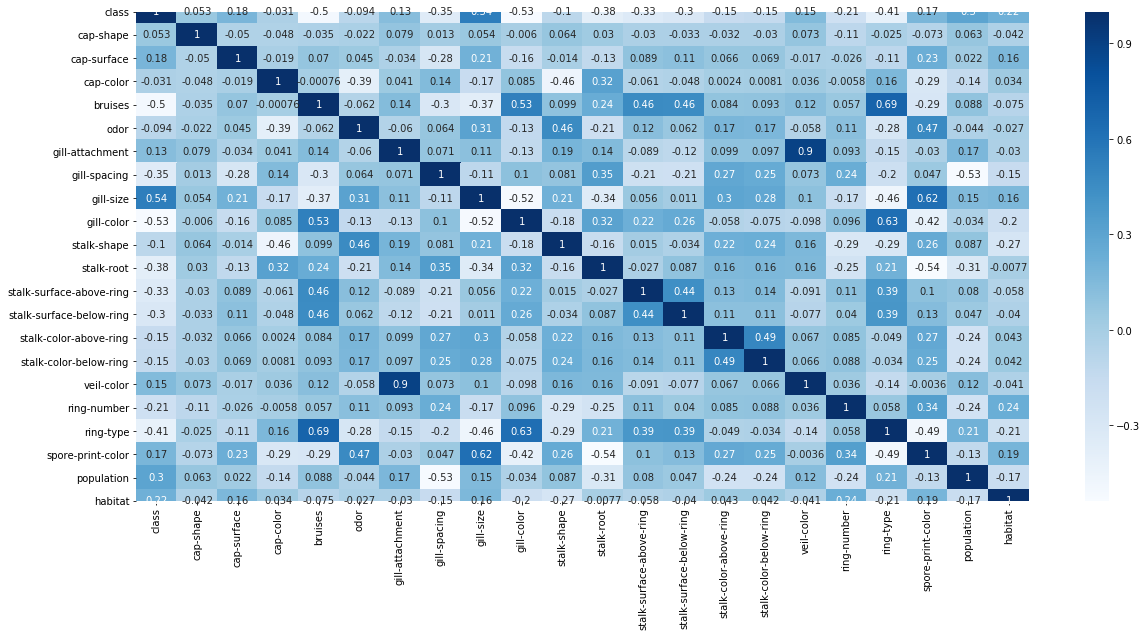

In [149]:
#correlation
fig = plt.figure(figsize=(20,9))
cor_matrix = df.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'Blues')
plt.show()

we can see some columns are having very low correlation with class variable

None of the columns are high correlation with class variable , 'gill-size and gill-color' are having '0.54 and -0.53' which is highest

In [150]:
cor_matrix['class'].sort_values(ascending = False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

we see that "cap-shape" , "cap-color" and "odor" are having very less correaltion , which is almost 0                

### lets check for outliers 

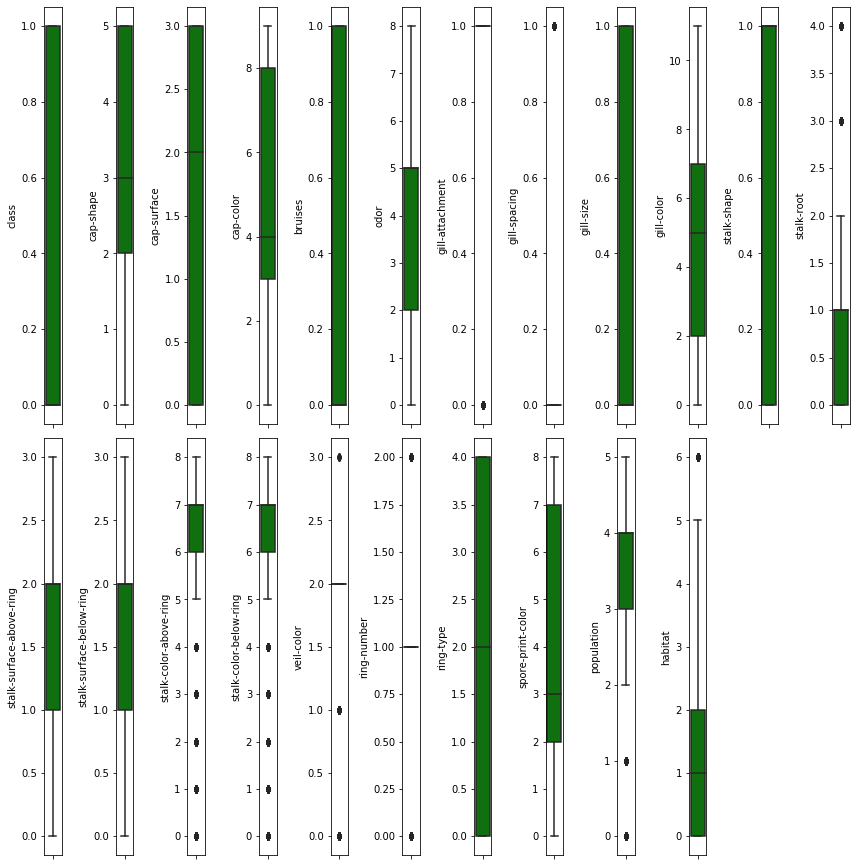

In [151]:
collist =df.columns
ncol = 12
nrows = 10
plt.figure(figsize= (ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient = 'v')
    plt.tight_layout()

we can see outliers present in  'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color' and others

### Lets check the distribution:

Since the data has been transformed with label encoder , it is not normal distributed

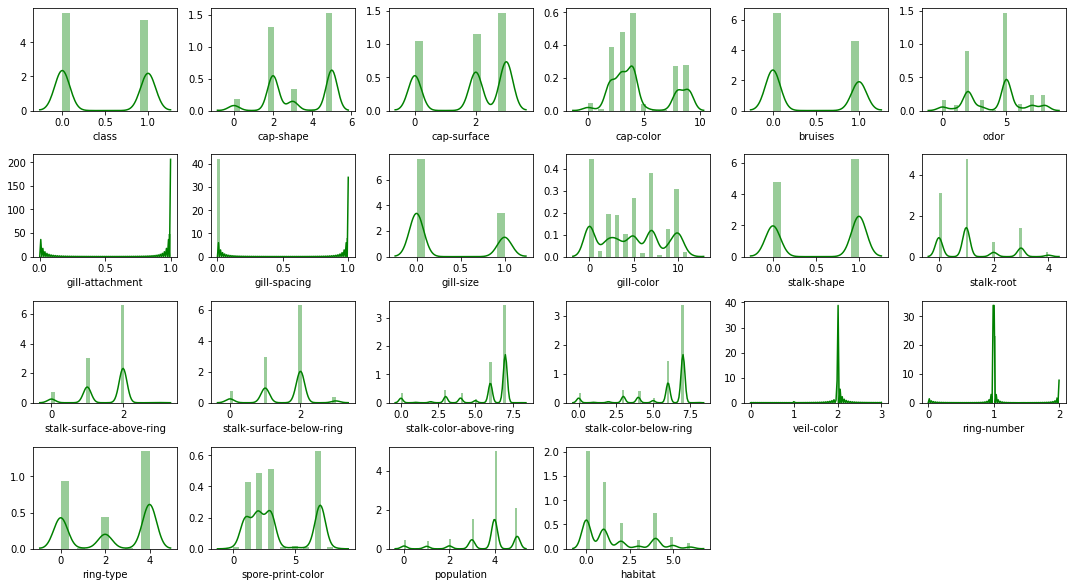

In [152]:
collist =df.columns
ncol = 6
nrows = 10
plt.figure(figsize= (15,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]],color='green')
    plt.tight_layout()

No column is normally distributed since every column is converted using label encoder

In [153]:
#sns.pairplot(df)

### skewness 

For this Dataset we should not remove skewness and outliers since all the data was categorical and converted using label encoding.

In [154]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

High skewness is present in 'gill attachment','veil-color', 'ring number',

There is skewness in the data as we have seen, in some columns skewness out of range -0.5 to +0.5

Even though we have outliers, skewness lets just leave it, since all the data was categorical and converted using label encoder

### Splitting the data to X and Y

In [155]:
y = df['class']
x = df.drop('class',axis = 1)

### Before splitting the data lets find the best random_state

In [156]:
maxaccu = 0
rand_state = 0
for i in range(42,100):

    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state= i )
    Decision_tree = DecisionTreeClassifier()
    Decision_tree.fit(x_train,y_train)
    pred = Decision_tree.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxaccu:
        maxaccu = acc
        rand_state = i
print('Best accuracy is {} on random state {}'.format(maxaccu,rand_state))   

Best accuracy is 1.0 on random state 42


In [157]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state= 42 )

## Model selection:

In [158]:
support_vector_classifer = SVC()
Logistic_Regression = LogisticRegression()
Random_Forest = RandomForestClassifier()

In [159]:
model_list = [Decision_tree, support_vector_classifer ,Logistic_Regression,Random_Forest]
least_difference = []
for m in model_list:
    print('\n')
    print(m)
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    accu = accuracy_score(y_test,pred)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score = cross_val_score(m,x,y,cv= 5)
    diffrence = np.abs(score.mean()-accu)
    print('The accuracy of {} is {} and Cross val score is {}'.format(m,accu,score.mean()))
    print('Difference b/w accurancy and cross val score:',diffrence)
    least_difference.append((m,diffrence))




DecisionTreeClassifier()
[[1257    0]
 [   0 1181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

The accuracy of DecisionTreeClassifier() is 1.0 and Cross val score is 0.9261229253505115
Difference b/w accurancy and cross val score: 0.07387707464948845


SVC()
[[1254    3]
 [  21 1160]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

The accuracy of SVC() is 0.9901558654634947 and Cross val score is 0.8420306934444864
Difference b/w 

In [160]:
for i,j in least_difference:
    print(i,j)

DecisionTreeClassifier() 0.07387707464948845
SVC() 0.1481251720190082
LogisticRegression() 0.10962499262498138
RandomForestClassifier() 0.10219734748010612


we can see that Decisiontree is having least diffrenence b/w its accurancy score and cross val score, So lets take decision tree as our final model
    

## Hyperparameter Tuning:

In [161]:
# lets create the parameter list to pass in GridsearchCv

In [162]:
parameters = {'max_depth':np.arange(2,15), 'criterion' : ['gini','entropy']}

In [163]:
gsv = GridSearchCV(estimator=Decision_tree , param_grid=parameters,cv =5)

In [164]:
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [165]:
gsv.best_params_

{'criterion': 'gini', 'max_depth': 7}

we found that 'gini' and 7 are the best parameters for decision tree using Hyperparameter tuning

## Creating a Final Model as Decision tree:

In [166]:
final_mod = DecisionTreeClassifier(criterion='gini',max_depth=7)
final_mod.fit(x_train,y_train)
pred = final_mod.predict(x_test)
accu =accuracy_score(y_test,pred)
print(accu*100)

100.0


## Saving the best model:

In [167]:
import joblib
joblib.dump(final_mod,'mashroom_final.obj')

['mashroom_final.obj']

In [168]:
mashroom_final = joblib.load('mashroom_final.obj')

In [169]:
mashroom_final.predict(x_test)

array([0, 1, 1, ..., 1, 0, 0])

## AUC ROC curve :

Since we have Decision tree as our final , lets check out the auc roc curve and score

In [170]:
Decision_tree.score(x_train,y_train)

1.0

In [171]:
y_pred_prob = Decision_tree.predict_proba(x_test)[:,1]
y_pred_prob

array([0., 1., 1., ..., 1., 0., 0.])

In [172]:
fpr,tpr,thresholds  = roc_curve(y_test,y_pred_prob)

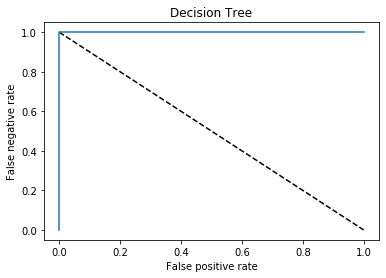

In [173]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'Decision Tree')
plt.xlabel('False positive rate')
plt.ylabel('False negative rate')
plt.title('Decision Tree')
plt.show()

AUC - ROC curve is graphical representation of confusion matrix

In [174]:
Decision_tree.fit(x_train,y_train)
log_pred = Decision_tree.predict(x_test)
accu =accuracy_score(y_test,log_pred)
print(accu*100)
print("AUC ROC Score: ",roc_auc_score(y_test,log_pred))

100.0
AUC ROC Score:  1.0
